# Proyek Analisis Data: Nama dataset
- Nama: Ridho Derri Safutra
- Email: derrisafutra.07@gmail.com
- Id Dicoding: <a href='https://www.dicoding.com/users/ridhosafutra21/academies'>ridhosafutra21</a>

# Menentukan Pertanyaan Bisnis

- pertanyaan 1 pada musim apa penyewaan sepeda paling banyak selama 2 tahun ini

- pertanyaan 2 Apa pengaruh cuaca terhadap jumlah pengguna casual

- pertanyaan 3 performa penyewaan sepeda dalam beberapa bulan di tahun 2012

# Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


# 1. Data Wrangling

### Gathering Data

In [2]:
url='https://drive.google.com/file/d/1kGN_r8piw08-Q9ZZC6j1c3lX4TDS3t-L/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
day_df = pd.read_csv(url)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [3]:
# Data undesrtanding dataset day.csv

# Melihat secara singkat statiska data
print("day_df.describe()")
print(day_df.describe(), end='\n\n')

# Melihat data kosong atau nilai data hilang
print("day_df.isnull()")
print(day_df.isnull().sum(), end='\n\n')

# Melihat type data dan jumalah baris dan kolom
print("day_df.info()")
print(day_df.info(), end='\n\n')

# Melihat data duplikat
print("day_df.duplicated()")
print(day_df.duplicated().sum())

day_df.describe()
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      

Tahap Assessing data dilakukan untuk pengecekan dataset dari menapilkan statiska sederhana, melihat missing value dan ternyata pada kedua data tidak terdapat nilai kosong atau hilang kemudian melihat jumlah dari baris dan kolom serta melihat data yang terindikasi duplikat setelah semua data di check nanti masuk ke tahap cleaning

### Cleaning Data

In [4]:
# df_day
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Check data type for df_day and df_hour
print('day_df["dteday"] : ', day_df["dteday"].dtypes)

day_df["dteday"] :  datetime64[ns]


Setelah dilakukan mecari data missing menggunakan isnul() ternyata tidak
ditemukan data yang hilang atau missing sehingga saya tidak perlu melakukan
perbaikan data sebaliknya saya merubah data datetime dari type object menjadi data datetime64[ns]

## Exploratory Data Analysis (EDA)

### Explore data menggunakan multivariate dan univariate



### multivariate (heatmap)

<Axes: >

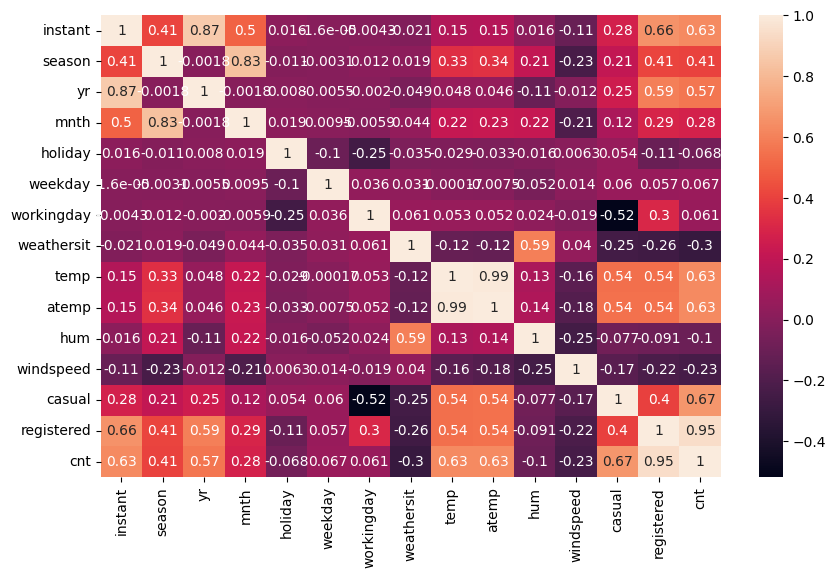

In [5]:
#heatmap
cor = day_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True)

multivariate digunakan untuk melihat korelasi antar kolom nilai yang digunakan dari 1 sampai -1, disini terlihat kolom yang memiliki korelasi paling kuat di antara kolom atemp dengan temo dan registered dengan cnt

### Univariate (Histogram dan piechart)

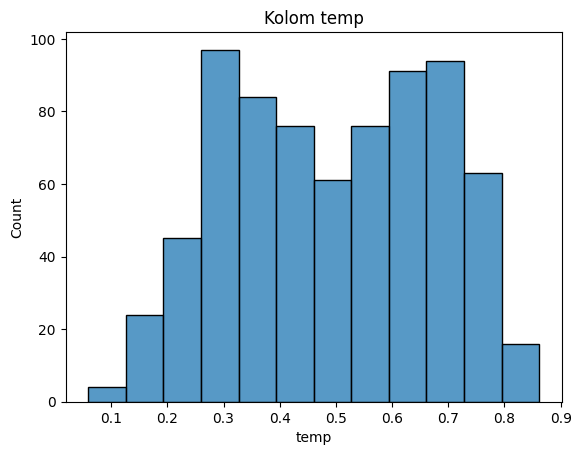

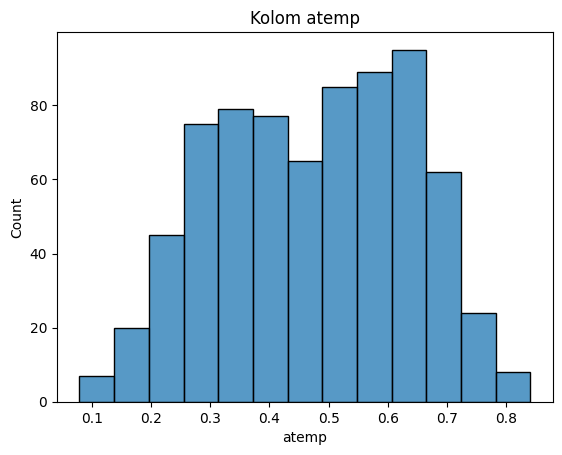

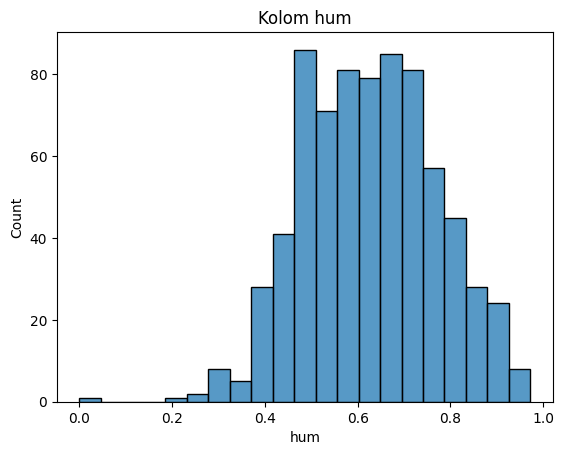

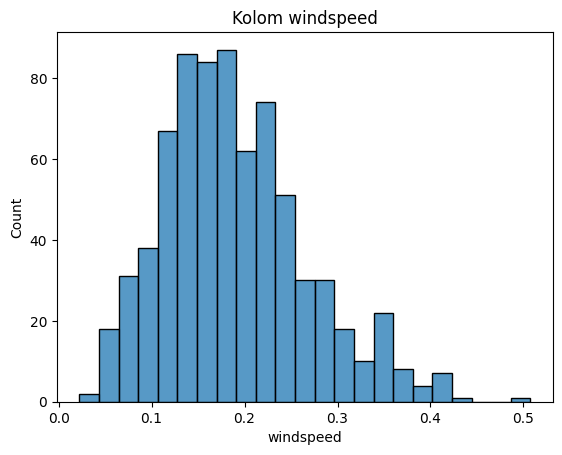

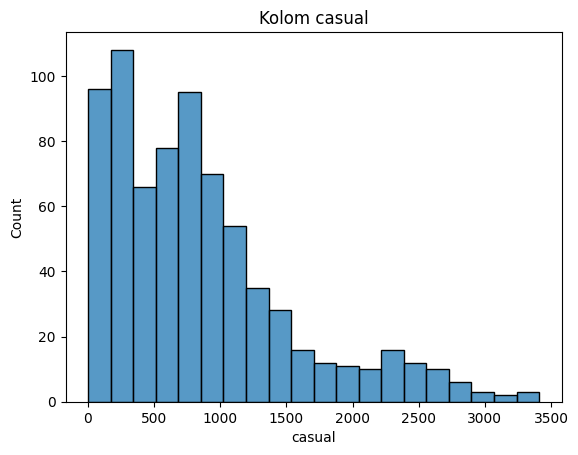

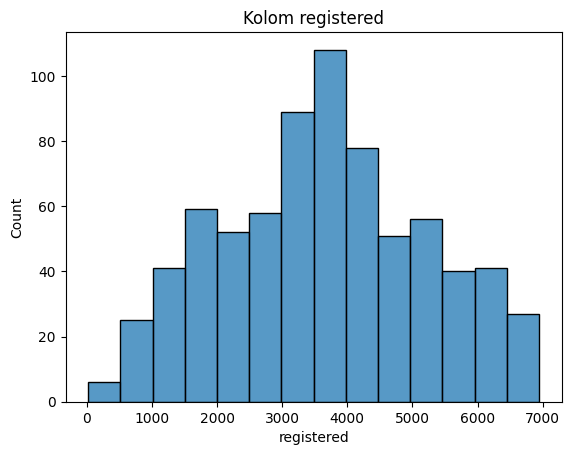

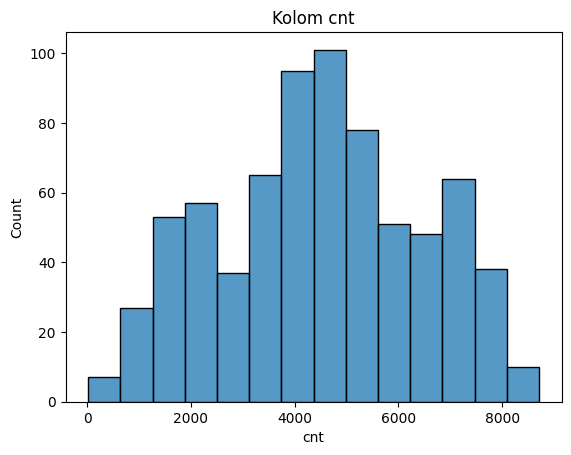

In [6]:
#Histogram
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for col in numeric_cols:
    fig = sns.histplot(data=day_df, x=col).set(title=f'Kolom {col}')
    plt.show()

histogram pada data diatas untuk menilai distribusi paling tinggi pada setiap kolom yang meiliki data type numerik seperti integer dan float

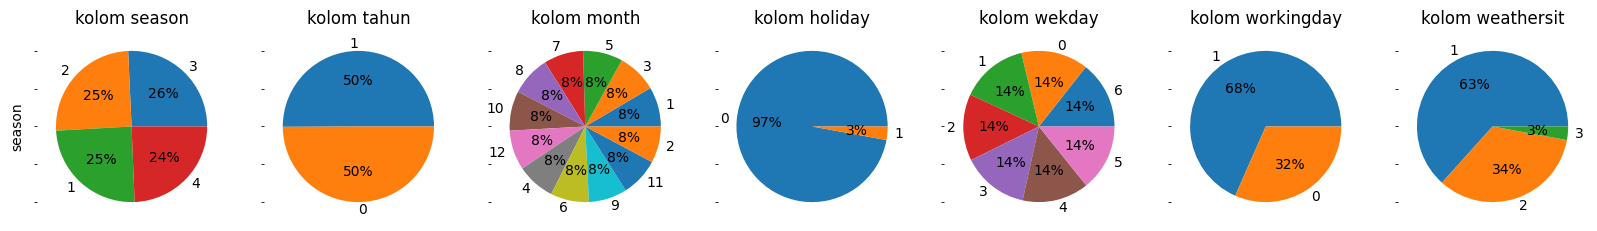

In [7]:
#piechart

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 10), sharey=True)

day_df["season"].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.0f%%', title='kolom season')
day_df["yr"].value_counts().plot(kind='pie', ax=axes[1],  autopct='%1.0f%%', title='kolom tahun')
day_df["mnth"].value_counts().plot(kind='pie', ax=axes[2],  autopct='%1.0f%%', title='kolom month')
day_df["holiday"].value_counts().plot(kind='pie', ax=axes[3],  autopct='%1.0f%%', title='kolom holiday')
day_df["weekday"].value_counts().plot(kind='pie', ax=axes[4],  autopct='%1.0f%%', title='kolom wekday')
day_df["workingday"].value_counts().plot(kind='pie', ax=axes[5],  autopct='%1.0f%%', title='kolom workingday')
day_df["weathersit"].value_counts().plot(kind='pie', ax=axes[6],  autopct='%1.0f%%', title='kolom weathersit')
plt.show()

untuk distribusi nilai dalam bentuk kategorikal atau bolean saya memakai pie chart karena bisa meilhat secara jelas persentase dalam distribusinya

## Visualization & Explanatory Analysis

### Pertanyaan 1: pada musim apa penyewaan sepeda paling banyak selama 2 tahun ini

In [8]:
#print musim
print("Musim dengan penyewaan sepeda paling banyak selama 2 tahun ini: 2(summer) \n ")

#grafik barchart musim
fig = px.bar(day_df["season"].value_counts().reset_index(), x='index', y='season')
fig.show()

Musim dengan penyewaan sepeda paling banyak selama 2 tahun ini: 2(summer) 
 


selama dua tahun ini jumlah total sewa sepeda pada 4 musim memiliki selisih yang tidak jauh dari musim semi berjumlah 181 sepeda, musim panas sebanyak 184 sepeda, musim gugur sebanyak 188 dan musim dingin sebanyak 184
dari data ini bisa terlihat bahwa musim yang paling banyak memiliki sewa sepeda adalah musim gugur oleh karena itu untuk kedepannya penyewaan sepeda untuk musim gugur lebih diperbanyak

### pertanyaan 2 Apa pengaruh cuaca terhadap jumlah total penyewa sepeda


In [9]:
# Buat scatter plot dengan Plotly untuk memvisualisasikan hubungan suhu (temp) dengan jumlah total penyewa sepeda
fig = px.scatter(day_df, x="temp", y="cnt", title="Hubungan Suhu dengan Jumlah Total Penyewa Sepeda")
fig.update_xaxes(title="Suhu (temp)")
fig.update_yaxes(title="Jumlah Pengguna casual")
fig.show()

untuk pertanyaan kedua lebih bagus kalau pakai grafik scatterplot karena kita bisa lebih tahu persebaran data terbanyak berada di suhu yang ke berapa, dari grafik diatas kita bisa lihat semakin tinggi suhu maka orang yang menyewa sepeda semakin meningkat namun suhu yang paling banyak orang yang minjam sekitaran 0.4 sampai 0.7

### pertanyaan 3 performa penyewaan sepeda dalam beberapa bulan di tahun 2012

In [10]:
filtered_data = day_df[(day_df["yr"] == 1)]

coba = px.line(day_df["mnth"].value_counts().sort_index(ascending=True))

coba.show()

grafik diatas menjelaskan performa penyewaan sepeda dari awal januari 2012 sampai desember 2012, terlihat performa penyewaan yang paling rendah di bulan ke 2 yaitu februari ini berkaitan karena di portugal masih musim dingin jarang ada masyrakat san ayang menggunakan sepeda pada musim dingin

## Conclusion

1. Faktor cuaca memiliki pengaruh signifikan terhadap jumlah sepeda yang disewa.
2. Penyewaan terbanyak ada di musim gugur oleh karena itu untuk kedepannya di musim gugur jumlah sepeda untuk disewa lebih diperbanyak
3. Hubungan antara suhu dan jumlah pengguna terdaftar penyewaan sepeda menunjukkan bahwa cuaca memengaruhi minat bersepeda, dengan peningkatan suhu cenderung meningkatkan jumlah pengguna.
4. jumlah sepeda yang di sewa pada bulan februari memiliki jumlah yang sedikit dikarenakan terkedala dengan musim dingin yang cenederung membuat jalan linci dan susah digunakan orang orang lebih mau pakai mobil atau jalan kaki daripada menggunakan sepeda.